# Data Mining HW2

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from pandas.tseries.offsets import Minute
from sklearn.cluster import KMeans

style.use('ggplot')

## Spatial Clustering 

In [2]:
df = pd.read_csv('location.csv')
df = df[['站名','經度','緯度']]
print df.head()

       站名        經度       緯度
0  五分山雷達站  121.7812  25.0712
1      板橋  121.4420  24.9976
2      淡水  121.4489  25.1649
3      鞍部  121.5297  25.1826
4      臺北  121.5149  25.0377


In [3]:
model = KMeans(n_clusters=4)
X = pd.DataFrame(df[['緯度','經度']])
X.columns = ['latitude','longitude']
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
print X['latitude'].head()
print X['longitude'].head()

0    25.0712
1    24.9976
2    25.1649
3    25.1826
4    25.0377
Name: latitude, dtype: float64
0    121.7812
1    121.4420
2    121.4489
3    121.5297
4    121.5149
Name: longitude, dtype: float64


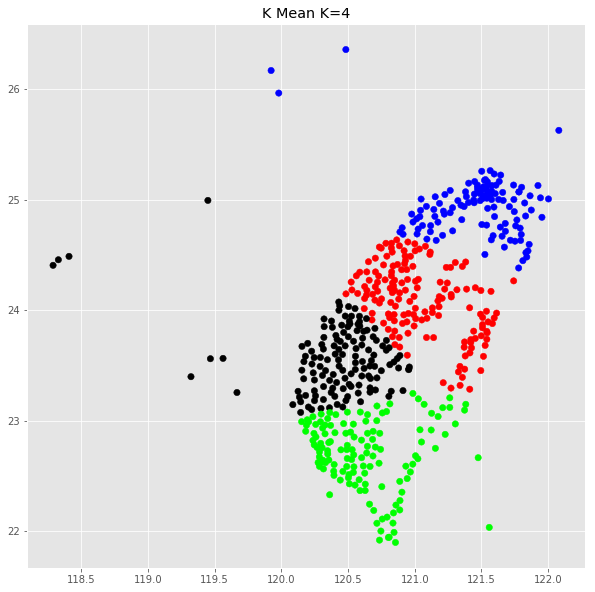

In [5]:
# View the results
# Set the size of the plot
plt.figure(figsize=(10,10))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black','blue'])
 
# Plot the Models Classifications
plt.scatter(X['longitude'], X['latitude'], c=colormap[model.labels_], s=40)
plt.title('K Mean K=4')

In [6]:
from sklearn.cluster import DBSCAN

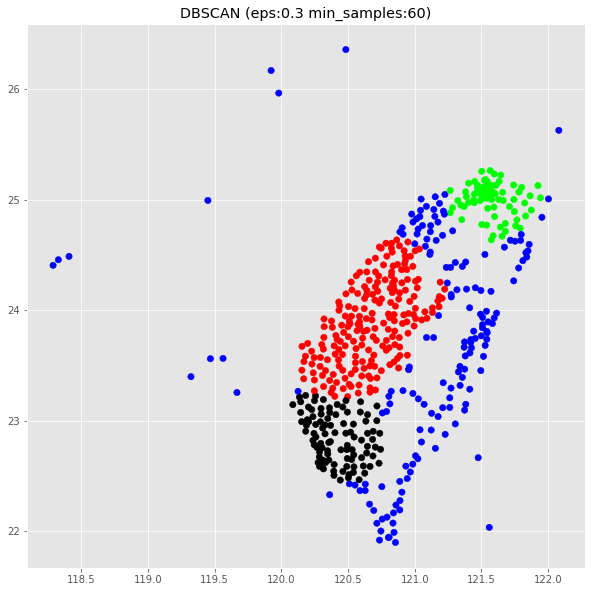

In [7]:
plt.figure(figsize=(10,10))
ep = 0.3
min_s = 60
db = DBSCAN(eps=ep, min_samples=min_s).fit(X)
colormap = np.array(['red', 'lime', 'black','y','blue'])
plt.scatter(X['longitude'], X['latitude'], c=colormap[db.labels_], s=40)
plt.title('DBSCAN (eps:0.3 min_samples:60)')

In [8]:
from sklearn import metrics

In [9]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    print str(n_clusters),silhouette_avg

2 0.486981226563
3 0.428620463226
4 0.392183614189
5 0.401745792044
6 0.414013630109
7 0.395037349673
8 0.40592307254
9 0.414849604138
10 0.398465457499


In [10]:
cluster_labels = db.fit_predict(X)
silhouette_avg = metrics.silhouette_score(X, cluster_labels)
print "DBSCAN",silhouette_avg

DBSCAN 0.23916024935


## Temporal Clustering : temperature of Taipei
### data from 2016/10/01 to 2017/06/30

In [11]:
df_weather = pd.read_csv('Weather.csv')
df_power = pd.read_csv('Taipower.csv')

# get all Temp data of Taipei from Weather.csv
Taipei = df_weather.loc[df_weather.Location == 'TAIPEI',['Timestamp','Temp']]
Taipei = Taipei.loc[Taipei.Timestamp >= '2016-10-01 00:00:00', :]
Taipei = Taipei.loc[Taipei.Timestamp <= '2017-06-30 23:59:59', :]
Taipei['Timestamp'] = pd.to_datetime(Taipei['Timestamp'])
# eliminate duplicate index value
Taipei = Taipei.drop_duplicates(subset='Timestamp', keep='last').set_index('Timestamp')
#Taipei = Taipei.drop(['Timestamp'],axis=1)

print Taipei.head()

                     Temp
Timestamp                
2016-10-01 00:00:00  27.6
2016-10-01 01:00:00  27.5
2016-10-01 02:00:00  27.6
2016-10-01 03:00:00  27.4
2016-10-01 04:00:00  27.3


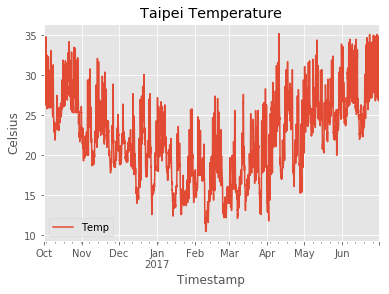

In [12]:
plt.figure()
plt.title('Taipei Temperature')
plt.xlabel('Date')
plt.ylabel('Celsius')
Taipei['Temp'].plot(subplots=True);
plt.legend()

In [13]:
Temp = Taipei.between_time('9:00','18:00')
print Temp
Temp = Temp.as_matrix().reshape(273,10)
print Temp
Temp_model = KMeans(n_clusters=4)
Temp_model.fit(Temp)

                     Temp
Timestamp                
2016-10-01 09:00:00  30.5
2016-10-01 10:00:00  31.4
2016-10-01 11:00:00  32.2
2016-10-01 12:00:00  32.6
2016-10-01 13:00:00  31.8
2016-10-01 14:00:00  31.9
2016-10-01 15:00:00  31.8
2016-10-01 16:00:00  31.1
2016-10-01 17:00:00  29.9
2016-10-01 18:00:00  28.9
2016-10-02 09:00:00  30.9
2016-10-02 10:00:00  32.1
2016-10-02 11:00:00  33.6
2016-10-02 12:00:00  34.5
2016-10-02 13:00:00  34.7
2016-10-02 14:00:00  34.8
2016-10-02 15:00:00  33.0
2016-10-02 16:00:00  31.6
2016-10-02 17:00:00  30.2
2016-10-02 18:00:00  28.6
2016-10-03 09:00:00  30.1
2016-10-03 10:00:00  31.2
2016-10-03 11:00:00  32.2
2016-10-03 12:00:00  32.3
2016-10-03 13:00:00  32.5
2016-10-03 14:00:00  32.5
2016-10-03 15:00:00  31.9
2016-10-03 16:00:00  31.2
2016-10-03 17:00:00  29.8
2016-10-03 18:00:00  29.0
...                   ...
2017-06-28 09:00:00  30.2
2017-06-28 10:00:00  32.9
2017-06-28 11:00:00  33.2
2017-06-28 12:00:00  34.3
2017-06-28 13:00:00  34.4
2017-06-28 1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
print Temp_model.labels_
silhouette_avg = metrics.silhouette_score(Temp, Temp_model.fit_predict(Temp))
print silhouette_avg

[2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 3 3 3 3 0 2
 2 0 3 3 3 0 2 2 0 0 2 0 2 0 0 0 3 3 3 0 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 0 3
 3 1 1 3 0 0 0 2 3 3 3 0 0 1 1 1 3 3 0 0 3 0 0 0 0 3 1 3 3 3 1 1 1 1 3 3 3
 1 1 1 1 1 1 1 3 3 0 1 1 1 1 3 3 3 3 3 3 1 1 1 1 1 3 3 3 0 3 0 3 3 3 1 1 1
 1 1 1 1 1 3 3 0 1 1 1 1 1 3 0 1 1 1 1 3 3 3 0 1 0 3 0 1 1 3 0 0 0 3 1 3 0
 0 0 0 0 2 2 2 3 1 3 3 0 2 2 0 0 0 2 1 3 3 0 0 1 3 0 0 2 0 0 2 2 0 0 2 0 2
 2 2 0 2 2 3 0 0 0 0 0 2 2 2 0 0 3 0 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 0 3 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2]
0.478810181159


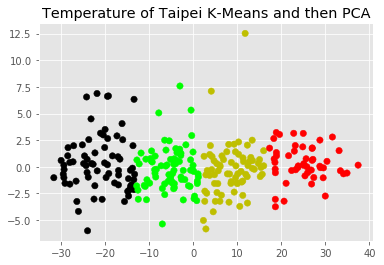

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Temp)
new_feature = pca.transform(Temp)
colormap = np.array(['red', 'lime', 'black','y','blue'])
plt.scatter(new_feature[:,0], new_feature[:,1], c=colormap[Temp_model.labels_], s=40)
plt.title('Temperature of Taipei K-Means and then PCA')

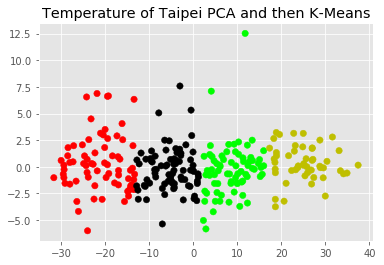

In [16]:
Temp_model_2 = KMeans(n_clusters=4)
Temp_model_2.fit(new_feature)
plt.scatter(new_feature[:,0], new_feature[:,1], c=colormap[Temp_model_2.labels_], s=40)
plt.title('Temperature of Taipei PCA and then K-Means')

In [17]:
cluster_labels = Temp_model.fit_predict(Temp)
silhouette_avg = metrics.silhouette_score(Temp, cluster_labels)
print "KMeans",silhouette_avg

KMeans 0.478810181159


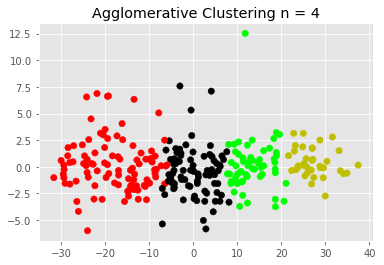

In [19]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4).fit(Temp)
colormap = np.array(['red', 'lime', 'black','y','blue','blue'])
plt.scatter(new_feature[:,0], new_feature[:,1], c=colormap[AC.labels_], s=40)
plt.title('Agglomerative Clustering n = 4')

In [20]:
cluster_labels = AC.fit_predict(Temp)
silhouette_avg = metrics.silhouette_score(Temp, cluster_labels)
print "Agglomerative Clustering",silhouette_avg

Agglomerative Clustering 0.450432549885


In [21]:
# get all PowerSupply data of (North)Taipei from Power.csv
Taipei_power = df_power.loc[df_power.Timestamp >= '2016-10-01 00:00:00', ['Timestamp','NorthSupply']]
Taipei_power = Taipei_power.loc[Taipei_power.Timestamp <= '2017-06-30 23:59:59', :]
Taipei_power['Datetime'] = pd.to_datetime(Taipei_power['Timestamp'])
# eliminate duplicate index value
Taipei_power = Taipei_power.drop_duplicates(subset='Timestamp', keep='last').set_index('Datetime')
Taipei_power = Taipei_power.drop(['Timestamp'],axis=1)
# data alignment
Taipei_power.index = Taipei_power.index - Minute(10)

In [22]:
print Taipei_power.head()

                     NorthSupply
Datetime                        
2016-10-01 00:00:00        779.2
2016-10-01 01:00:00        761.0
2016-10-01 02:00:00        740.1
2016-10-01 03:00:00        727.6
2016-10-01 04:00:00        705.8


In [23]:
# missing date 1/25 ~ 4/19
# 2017-01-25 01:10:00,637.8,725.4,569.7,570.3,850.6,738.0,3.3,27.7
# 2017-04-19 19:10:00,976.6,1096.4,900.7,814.1,1090.2,1020.9,6.3,42.4
temp = Taipei_power.resample('H').mean()
df1 = temp.truncate('2016-10-01', '2017-01-25')
df2 = temp.truncate('2017-04-20', '2017-07-01')
power = pd.concat([df1, df2])

#result = result.resample('H').mean()
power = power.between_time('9:00','18:00').fillna(method='ffill')
print len(power)
print power

1880
                     NorthSupply
Datetime                        
2016-10-01 09:00:00        813.9
2016-10-01 10:00:00        885.9
2016-10-01 11:00:00        943.0
2016-10-01 12:00:00        907.5
2016-10-01 13:00:00        901.7
2016-10-01 14:00:00        920.8
2016-10-01 15:00:00        919.1
2016-10-01 16:00:00        882.2
2016-10-01 17:00:00        873.4
2016-10-01 18:00:00        876.7
2016-10-02 09:00:00        683.0
2016-10-02 10:00:00        710.2
2016-10-02 11:00:00        740.3
2016-10-02 12:00:00        766.2
2016-10-02 13:00:00        779.2
2016-10-02 14:00:00        777.5
2016-10-02 15:00:00        799.8
2016-10-02 16:00:00        806.8
2016-10-02 17:00:00        784.1
2016-10-02 18:00:00        827.9
2016-10-03 09:00:00        827.9
2016-10-03 10:00:00        827.9
2016-10-03 11:00:00        827.9
2016-10-03 12:00:00        827.9
2016-10-03 13:00:00        827.9
2016-10-03 14:00:00       1150.5
2016-10-03 15:00:00       1111.3
2016-10-03 16:00:00       1114.3
2016-

In [24]:
power = power.as_matrix().reshape(-1,10)
power

array([[  813.9,   885.9,   943. , ...,   882.2,   873.4,   876.7],
       [  683. ,   710.2,   740.3, ...,   806.8,   784.1,   827.9],
       [  827.9,   827.9,   827.9, ...,  1114.3,  1094.9,  1107.7],
       ..., 
       [ 1084.3,  1102.8,  1194. , ...,  1195.9,  1180.1,  1170.6],
       [ 1110.4,  1152.1,  1187. , ...,  1172.5,  1095.1,  1076.4],
       [ 1058.2,  1092.1,  1149.6, ...,  1169.5,  1174.7,  1166.1]])

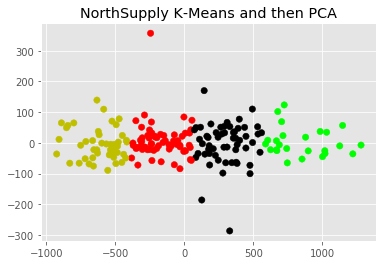

In [25]:
Power_model = KMeans(n_clusters=4)
Power_model.fit(power)
pca = PCA(n_components=2)
pca.fit(power)
new_feature = pca.transform(power)
colormap = np.array(['red', 'lime', 'black','y','blue'])
plt.scatter(new_feature[:,0], new_feature[:,1], c=colormap[Power_model.labels_], s=40)
plt.title('NorthSupply K-Means and then PCA')

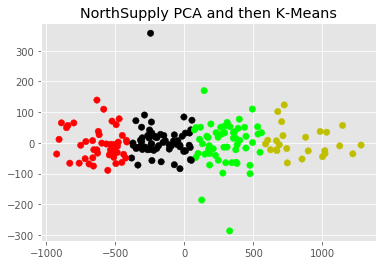

In [26]:
Power_model_2 = KMeans(n_clusters=4)
Power_model_2.fit(new_feature)
plt.scatter(new_feature[:,0], new_feature[:,1], c=colormap[Power_model_2.labels_], s=40)
plt.title('NorthSupply PCA and then K-Means')

In [27]:
cluster_labels = Power_model.fit_predict(power)
silhouette_avg = metrics.silhouette_score(power, cluster_labels)
print "KMeans",silhouette_avg

KMeans 0.455601333556


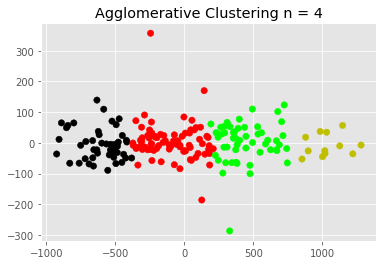

In [28]:

AC = AgglomerativeClustering(n_clusters=4).fit(power)
colormap = np.array(['red', 'lime', 'black','y','blue','blue'])
plt.scatter(new_feature[:,0], new_feature[:,1], c=colormap[AC.labels_], s=40)
plt.title('Agglomerative Clustering n = 4')

In [29]:
cluster_labels = AC.fit_predict(power)
silhouette_avg = metrics.silhouette_score(power, cluster_labels)
print "Agglomerative Clustering",silhouette_avg

Agglomerative Clustering 0.443159059785
